# Введение в машинное обучение

## Введение
Мы начнем с того, как работают модели машинного обучения и как они используются. Это может показаться простым, если вы раньше занимались статистическим моделированием или машинным обучением.

В этом статье мы будем создавать модели по следующему сценарию:

Ваш кузен заработал миллионы долларов, спекулируя недвижимостью. Он предложил вам стать деловыми партнерами из-за вашего интереса к науке о данных. Он предоставит деньги, а вы предоставите модели, которые предсказывают, сколько стоят различные дома.

Вы спрашиваете своего кузена, как он предсказывал стоимость недвижимости в прошлом и он говорит, что это просто интуиция. Но дальнейшие вопросы показывают, что он определил модели цен на дома, которые видел в прошлом, и использует эти модели, чтобы делать прогнозы для новых домов, которые он рассматривает.

Мы начнем с модели, называемой "Деревом решений". Есть более интересные модели, которые дают более точные прогнозы. Но деревья решений легко понять, и они являются основным строительным блоком для некоторых из лучших моделей в науке о данных.

### Дерева решений

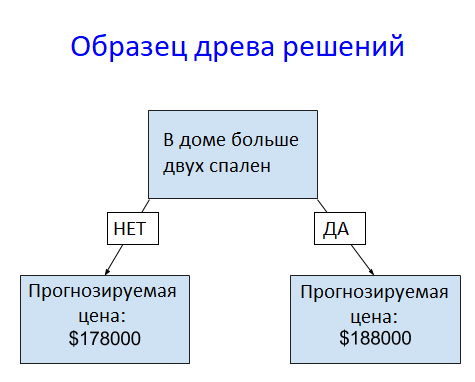

Он делит дома только на две категории. Прогнозируемая цена для любого рассматриваемого дома - это историческая средняя цена домов той же категории.

Мы используем данные, чтобы решить, как разбить дома на две группы, а затем снова определить прогнозируемую цену в каждой группе. Этот шаг сбора закономерностей из данных называется подгонкой или обучением модели. Данные, используемые для подбора модели, называются обучающими данными.

Детали того, как подходит модель (например, как разделить данные), достаточно сложны, и мы сохраним их на потом. После того, как модель подобрана, вы можете применить ее к новым данным, чтобы спрогнозировать цены на дополнительные дома.
### Улучшение дерева решений
Какое из следующих двух деревьев решений с большей вероятностью будет результатом подбора данных обучения недвижимости?

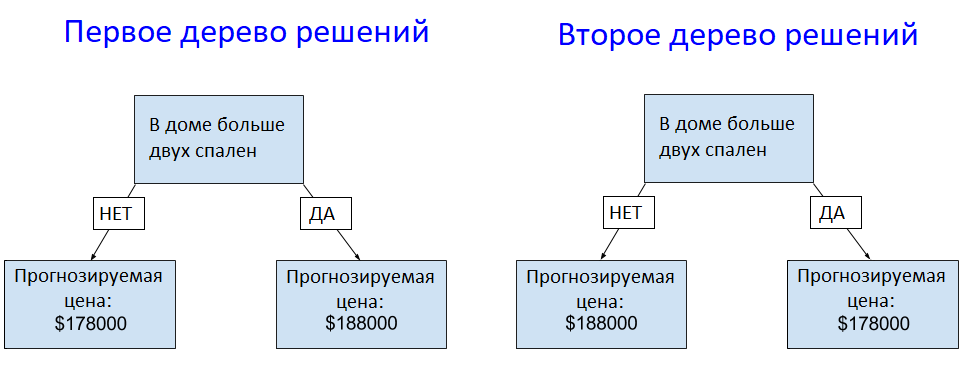

Дерево решений слева (первое дерево решений), вероятно, имеет больше смысла, потому что оно отражает реальность того, что дома с большим количеством спален, как правило, продаются по более высоким ценам, чем дома с меньшим количеством спален. Самым большим недостатком этой модели является то, что она не учитывает большинство факторов, влияющих на стоимость дома, таких как количество ванных комнат, размер участка, местоположение и т. д.

Вы можете захватить больше факторов, используя дерево с большим количеством «разбиений». Их называют «более глубокими» деревьями. Дерево решений, которое также учитывает общий размер участка каждого дома, может выглядеть так:

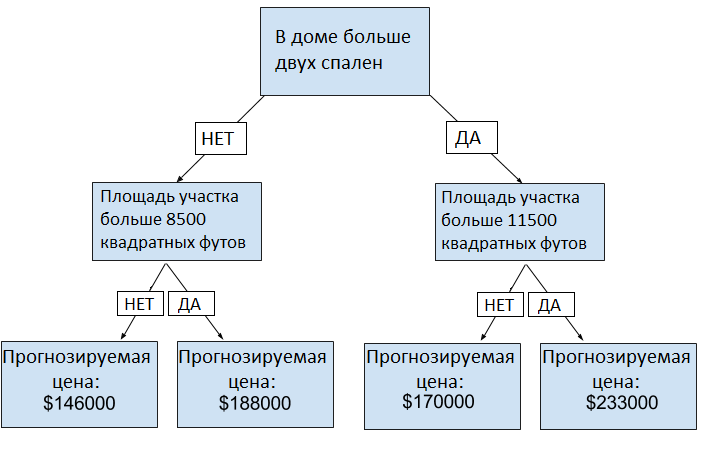

Мы прогнозируете цену любого дома, отслеживая дерево решений, всегда выбирая путь, соответствующий характеристикам этого дома. Прогнозируемая цена дома указана внизу дерева. Точка внизу, где мы делаем прогноз, называется листом.

Разделение и значения на листьях будут определяться данными, поэтому вам пора проверить данные, с которыми вы будете работать.

## Использование Pandas для ознакомления с нашими данными
Первым шагом в любом проекте машинного обучения является ознакомление с данными. Для этого вы будете использовать библиотеку Pandas. Pandas - это основной инструмент, который специалисты по данным используют для исследования и обработки данных. Большинство людей сокращают pandas в своем коде как pd. Делаем это с помощью команды

In [1]:
import pandas as pd

Самая важная часть библиотеки Pandas - DataFrame. DataFrame содержит тип данных, который вы можете представить в виде таблицы. Это похоже на лист в Excel или таблицу в базе данных SQL.

У Pandas есть мощные методы для большинства вещей, которые вы захотите делать с этим типом данных.

В качестве примера рассмотрим данные о ценах на жилье в Мельбурне, Австралия. В практических упражнениях вы примените те же процессы к новому набору данных, в котором указаны цены на жилье в Айове.

Данные примера (Мельбурн) находятся по пути к файлу 
'../input/melbourne-housing-snapshot/melb_data.csv'.

Загружаем и исследуем данные с помощью следующих команд:

In [2]:
# Сохраняем путь к файлу в переменную для облегчения доступа
melbourne_file_path = 'pandas/melb_data.csv'
# Считываем данные и сохраняем данные в DataFrame под названием melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# Выводим данные в Melbourne_data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Интерпретация описания данных
Результаты показывают 8 чисел для каждого столбца исходного набора данных. Первое число, счетчик, показывает, сколько строк содержат непропущенные значения.

Недостающие значения возникают по многим причинам. Например, при съемке дома с 1 спальней размер 2-й спальни не собирался. Вернемся к теме недостающих данных.

Второе значение - это среднее, то есть среднее арифметическое значение. В соответствии с этим, std - это стандартное отклонение, которое измеряет, насколько значения разбросаны от среднего.

Чтобы интерпретировать минимальные, 25%, 50%, 75% и максимальные значения, представьте себе сортировку каждого столбца от самого низкого до самого высокого значения. Первое (наименьшее) значение - это мин. Если вы пройдете по списку на четверть, вы найдете число, которое больше 25% значений и меньше 75% значений. Это значение 25% (произносится как «25-й процентиль»). Аналогично определяются 50-й и 75-й процентили, а максимальное число - это наибольшее число.

## Выбор данных для моделирования

В вашем наборе данных было слишком много переменных. Как можно сократить этот огромный объем данных?

Начнем с выбора нескольких переменных, используя нашу интуицию. Более поздние курсы покажут вам статистические методы автоматического определения приоритетов переменных.

Чтобы выбрать переменные / столбцы, нам нужно увидеть список всех столбцов в наборе данных. Это делается с помощью свойства columns DataFrame.

In [3]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
# В данных Мельбурна есть некоторые недостающие значения (некоторые дома, для которых не были записаны некоторые переменные).
# Мы научимся обрабатывать отсутствующие значения в следующем учебном пособии.
# В ваших данных Айовы нет пропущенных значений в используемых столбцах.
# Итак, мы сейчас возьмем самый простой вариант и отбросим дома из наших данных.
# Не беспокойтесь об этом сейчас, хотя код такой:
# dropna удаляет отсутствующие значения (воспринимайте nan как "недоступно")
melbourne_data = melbourne_data.dropna(axis=0)

Есть много способов выбрать подмножество ваших данных, но пока мы сосредоточимся на двух подходах.

1.Точечная запись, которую мы используем для выбора «цели прогноза»

2.Выбор с помощью списка столбцов, который мы используем для выбора «функций»
### Выбор цели прогноза
Вы можете извлечь переменную с точечной нотацией. Этот единственный столбец хранится в серии, которая в целом похожа на DataFrame только с одним столбцом данных.

Мы будем использовать точечную нотацию для выбора столбца, который мы хотим прогнозировать, который называется целью прогнозирования. По соглашению цель прогнозирования называется "y". Итак, код, который нам нужен для сохранения цен на жилье в данных Мельбурна, следующий:

In [5]:
y = melbourne_data.Price

### Выбор признаков
Столбцы, которые вводятся в нашу модель (а затем используются для прогнозов), называются «признаками». В нашем случае это будут столбцы, используемые для определения цены дома. Иногда в качестве признаков используются все столбцы, кроме целевого. В других случаях вам будет лучше с меньшим количеством функций.

А пока мы построим модель только с несколькими признаками. Позже вы увидите, как повторять и сравнивать модели, построенные с различными признаками.

Мы выбираем несколько признаков, предоставляя список имен столбцов в скобках. Каждый элемент в этом списке должен быть строкой (в кавычках).

Вот пример:

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

По соглашению эти данные называются "X".

In [7]:
X = melbourne_data[melbourne_features]

Давайте рассмотрим данные, которые мы будем использовать для прогнозирования цен на жилье, используя метод describe и метод head, который показывает несколько верхних строк.

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


Визуальная проверка данных с помощью этих команд - важная часть работы специалиста по данным. В наборе данных часто встречаются сюрпризы, заслуживающие дальнейшего изучения.
### Создание нашей модели
Мы будем использовать библиотеку scikit-learn для создания своих моделей. При кодировании эта библиотека пишется как sklearn, как мы увидем в примере кода. Scikit-learn - это, пожалуй, самая популярная библиотека для моделирования типов данных, обычно хранящихся в DataFrames.

Шаги по созданию и использованию модели:

Определение типа модели: какой это будет тип модели? Дерево решений? Какой-то другой тип модели? Также указаны некоторые другие параметры типа модели.

Обучение: захват шаблонов из предоставленных данных. Это сердце моделирования.

Прогноз: как это выглядит

Оценка: определить, насколько точны прогнозы модели.

Вот пример определения модели дерева решений с помощью scikit-learn и согласования ее с функциями и целевой переменной.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Определите модель. Укажите число для random_state, чтобы гарантировать одинаковые результаты при каждом запуске
melbourne_model = DecisionTreeRegressor(random_state=1)

# Подходящая модель
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Многие модели машинного обучения допускают некоторую случайность в обучении моделей. Указание числа для random_state гарантирует, что вы получите одинаковые результаты при каждом запуске. Это считается хорошей практикой. Вы используете любое число, и качество модели не будет существенно зависеть от того, какое именно значение вы выберете.

Теперь у нас есть подобранная модель, которую мы можем использовать для прогнозов.

На практике вы захотите сделать прогнозы относительно новых домов, которые появятся на рынке, а не домов, на которые у нас уже есть цены. Но мы сделаем прогнозы для первых нескольких строк обучающих данных, чтобы увидеть, как работает функция прогнозирования.

In [11]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Проверка модели
Мы построили модель. Но насколько она хороша?

Здесь мы научимся использовать проверку модели для измерения качества нашей модели. Измерение качества модели - ключ к многократному улучшению наших моделей.
### Что такое проверка модели
Мы захотите оценить почти каждую модель, которую мы когда-либо строили. В большинстве приложениях важным показателем качества модели является точность прогнозов. Другими словами, будут ли прогнозы модели близки к тому, что происходит на самом деле.

Многие люди совершают огромную ошибку при измерении точности прогнозов. Они делают прогнозы на основе своих данных обучения и сравнивают эти прогнозы с целевыми значениями в данных обучения. Вы увидите проблему с этим подходом и как ее решить через мгновение, но давайте сначала подумаем, как мы это сделаем.

Сначала нам нужно подвести итоги качества модели в понятной форме. Если вы сравните прогнозируемую и фактическую стоимость домов для 10 000 домов, вы, вероятно, найдете сочетание хороших и плохих прогнозов. Просматривать список из 10 000 прогнозируемых и фактических значений бессмысленно. Нам нужно свести это в единую метрику.

Существует множество показателей для оценки качества модели, но мы начнем с одной, называемой средней абсолютной ошибкой. Давайте разберем этот показатель, начиная с последнего слова - ошибка.

Ошибка прогноза для каждого дома:

Ошибка = фактическое-прогнозируемое
Итак, если дом стоит 150 000 долларов, а вы предсказали, что он будет стоить 100 000 долларов, ошибка составит 50 000 долларов.

С помощью метрики мы берем абсолютное значение каждой ошибки. Это преобразует каждую ошибку в положительное число. Затем мы берем среднее значение этих абсолютных ошибок. Это наша мера качества модели. Проще говоря, это можно сказать как

В среднем наши прогнозы отклоняются примерно на X.

Когда у нас есть модель, вот как мы вычисляем среднюю абсолютную ошибку:

In [12]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

### Проблема с оценками "в выборке"
Только что вычисленный показатель можно назвать оценкой "в выборке". Мы использовали один «образец» домов как для построения модели, так и для ее оценки. Вот почему это плохо.

Представьте, что на большом рынке недвижимости цвет двери не зависит от цены дома.

Однако в выборке данных, которую вы использовали для построения модели, все дома с зелеными дверями были очень дорогими. Задача модели - найти закономерности, предсказывающие цены на дома, чтобы они видели эту закономерность и всегда предсказывали высокие цены на дома с зелеными дверями.

Поскольку этот шаблон был получен из обучающих данных, модель будет казаться точной в обучающих данных.

Но если этот шаблон не выполняется, когда модель видит новые данные, модель будет очень неточной при использовании на практике.

Поскольку практическая ценность моделей заключается в прогнозировании новых данных, мы измеряем производительность на данных, которые не использовались для построения модели. Самый простой способ сделать это - исключить некоторые данные из процесса построения модели, а затем использовать их для проверки точности модели на данных, которые она раньше не видела. Эти данные называются данными проверки.

### Программирование
В библиотеке scikit-learn есть функция train_test_split, которая разбивает данные на две части. Мы будем использовать некоторые из этих данных в качестве обучающих данных, чтобы соответствовать модели, а другие данные мы будем использовать в качестве данных проверки для вычисления mean_absolute_error.

Вот код:

In [13]:
from sklearn.model_selection import train_test_split

# разделить данные на данные обучения и проверки, как для функций, так и для цели
# Разделение основано на генераторе случайных чисел. Подача числового значения в
# аргумент random_state гарантирует, что мы получим одно и то же разбиение каждый раз, когда
# запустить этот скрипт.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Определить модель
melbourne_model = DecisionTreeRegressor()
# Подходящая модель
melbourne_model.fit(train_X, train_y)

# получить прогнозируемые цены по данным проверки
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

272762.68646438565


### Вот Это Да!
Наша средняя абсолютная ошибка для данных в выборке составила более 1000 долларов. Вне выборки более 250 тысяч долларов.

В этом разница между моделью, которая почти идеально подходит, и моделью, непригодной для большинства практических целей. Для справки, средняя стоимость дома по данным проверки составляет 1,1 миллиона долларов. Таким образом, ошибка в новых данных составляет около четверти средней стоимости дома.

Есть много способов улучшить эту модель, например, поэкспериментировать, чтобы найти лучшие признаки или разные типы моделей.
## Недостаточное и переобучение
В конце этого шага вы поймете концепции недостаточного и переобучения и сможете применить эти идеи, чтобы сделать свои модели более точными.

### Экспериментирование с разными моделями
Теперь, когда у нас есть надежный способ измерения точности модели, вы можете поэкспериментировать с альтернативными моделями и посмотреть, какие из них дают наилучшие прогнозы. Но какие у нас есть альтернативы моделям?

В документации scikit-learn вы можете увидеть, что модель дерева решений имеет много опций (больше, чем нам нужно или понадобится в течение длительного времени). Наиболее важные параметры определяют глубину дерева. Вспомните из первого урока этого микрокурса, что глубина дерева - это мера того, сколько расщеплений оно делает перед тем, как прийти к прогнозу. Это относительно неглубокое дерево

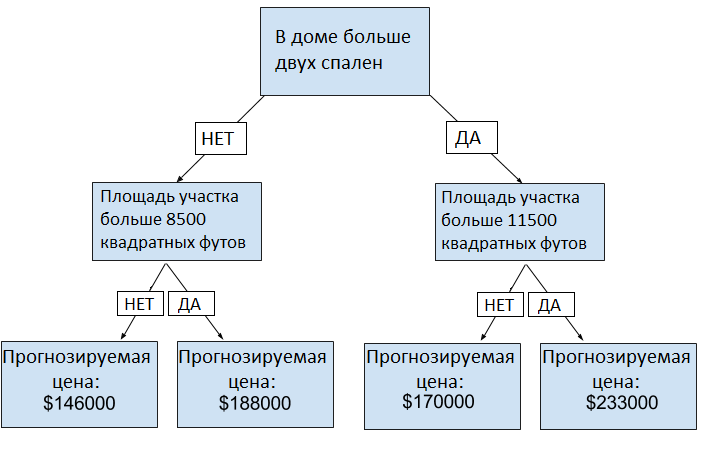

На практике дерево нередко имеет 10 секций между верхним уровнем и листом. По мере того как дерево становится глубже, набор данных разрезается на листья с меньшим количеством домов. Если в дереве было всего 1 разбиение, оно делит данные на 2 группы. Если каждую группу снова разделить, мы получим 4 группы домов. Повторное разделение каждого из них приведет к созданию 8 групп. Если мы продолжим удваивать количество групп, добавляя больше разделений на каждом уровне, у нас будет 210 групп домов к тому времени, когда мы дойдем до 10-го уровня. Это 1024 листа.

Когда мы делим дома на множество листьев, у нас также становится меньше домов на каждом листе. Листья с очень небольшим количеством домов будут давать прогнозы, которые достаточно близки к фактическим значениям этих домов, но они могут давать очень ненадежные прогнозы для новых данных (поскольку каждый прогноз основан только на нескольких домах).

Это явление, называемое переобучением, когда модель почти идеально соответствует обучающим данным, но плохо справляется с проверкой и другими новыми данными. С другой стороны, если мы сделаем дерево очень неглубоким, оно не разделит дома на очень отдельные группы.

В крайнем случае, если дерево делит дома только на 2 или 4, в каждой группе все равно будет множество домов. Результирующие прогнозы могут быть далекими для большинства домов, даже в обучающих данных (и это будет плохо при проверке по той же причине). Когда модели не удается уловить важные различия и закономерности в данных, поэтому она плохо работает даже в обучающих данных, это называется недостаточной подгонкой.

Поскольку мы заботимся о точности новых данных, которые мы оцениваем на основе наших данных проверки, мы хотим найти золотую середину между недостаточным и избыточным соответствием. Визуально нам нужна нижняя точка (красной) кривой проверки в

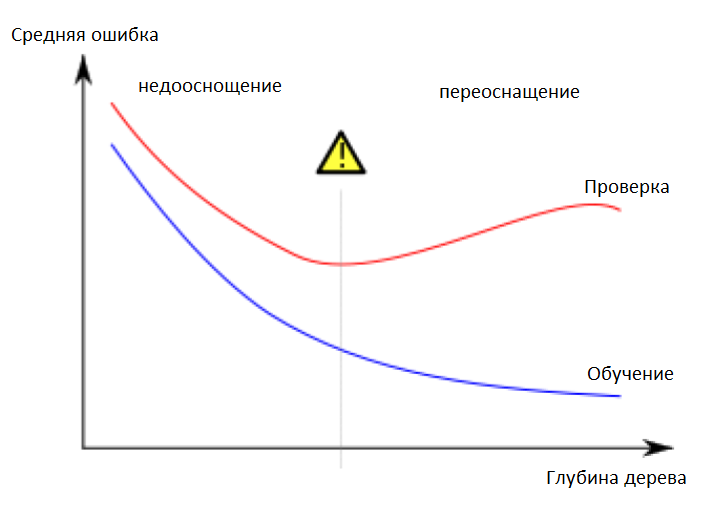

### Пример
Есть несколько альтернатив для управления глубиной дерева, и многие позволяют, чтобы некоторые маршруты через дерево имели большую глубину, чем другие маршруты. Но аргумент max_leaf_nodes предоставляет очень разумный способ контролировать переобучение и недостаточное обучение. Чем больше листьев мы позволяем сделать модели, тем больше мы перемещаемся от области недостаточного обучение на приведенном выше графике к области переобучения.

Мы можем использовать служебную функцию, чтобы сравнить оценки для разных значений max_leaf_nodes:

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Данные загружаются в train_X, val_X, train_y и val_y с использованием кода, который мы уже видели (и который мы уже написали).

Мы можем использовать цикл for для сравнения точности моделей, построенных с разными значениями max_leaf_nodes.

In [15]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


Из перечисленных вариантов 500 - оптимальное количество листочков.
### Заключение
Вывод: модели могут пострадать от:

Переобучение: фиксация ложных паттернов, которые не повторится в будущем, что приводит к менее точным прогнозам

Недостаточное соответствие: неспособность уловить соответствующие закономерности, что снова приводит к менее точным прогнозам.

Мы используем данные проверки, которые не используются при обучении модели, для измерения точности модели-кандидата. Это позволяет нам опробовать множество моделей-кандидатов и сохранить лучшую.
## Случайные леса
### Введение
Деревья решений оставляют нас перед трудным решением. Глубокое дерево с большим количеством листьев подойдет, потому что каждое предсказание основывается на исторических данных только по нескольким домам на его листе. Но неглубокое дерево с небольшим количеством листьев будет плохо работать, потому что не сможет уловить столько различий в необработанных данных.

Даже самые сложные современные методы моделирования сталкиваются с этим противоречием между недостаточной и чрезмерной подгонкой. Но у многих моделей есть умные идеи, которые могут улучшить производительность. В качестве примера рассмотрим случайный лес.

В случайном лесу используется много деревьев, и он делает прогноз, усредняя прогнозы каждого дерева компонентов. Как правило, оно имеет гораздо лучшую точность прогнозирования, чем одно дерево решений, и хорошо работает с параметрами по умолчанию. Если вы продолжите моделирование, вы сможете изучить больше моделей с еще большей производительностью, но многие из них чувствительны к получению правильных параметров.

### Пример
Мы уже видели код для загрузки данных несколько раз. В конце загрузки данных у нас есть следующие переменные:

train_X

val_X

train_y

val_y

Мы строим модель случайного леса аналогично тому, как мы строили дерево решений в scikit-learn - на этот раз с использованием класса RandomForestRegressor вместо DecisionTreeRegressor.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

207190.6873773146


### Заключение
Вероятно, есть возможности для дальнейшего улучшения, но это большое улучшение по сравнению с ошибкой лучшего дерева решений, равной 250 000. Есть параметры, которые позволяют вам изменять производительность случайного леса так же, как мы изменили максимальную глубину одного дерева решений. Но одна из лучших особенностей моделей случайного леса заключается в том, что они обычно работают нормально даже без этой настройки.